<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/(Ad)Linear_Reg%26Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
df=pd.read_csv('Fish.csv',error_bad_lines=False)
df=df.copy()

In [9]:
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
107,Perch,300.0,26.9,28.7,30.1,7.5852,4.6354
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
71,Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
83,Perch,115.0,19.0,21.0,22.5,5.9175,3.3075
39,Roach,120.0,18.6,20.0,22.2,6.2160,3.5742
151,Smelt,10.0,11.3,11.8,13.1,2.2139,1.2838
149,Smelt,9.8,10.7,11.2,12.4,2.0832,1.2772
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
117,Perch,650.0,36.5,39.0,41.4,11.1366,6.0030
31,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920


Meanings of the Columns:

Species: Species name of fish

Weight: Weight of fish in gram

Length1: Vertical length in cm

Length2: Diagonal length in cm

Length3: Cross length in cm

Height: Height in cm

Width: Diagonal width in cm

Our dependent variable is 'Weight'. 

Independent variables are 'species', different 

lengths, 'height' and 'width'.

I will use independent variables (measurements of the fish) to estimate dependent variable (weight of the fish).

In [12]:
#Change the columns names

df.rename(columns={'Length1':'LengthVer','Length2':'LengthDia','Length3':'LengthCro'},inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [37]:
df.shape

(159, 7)

In [13]:
df.info() #non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    159 non-null    object 
 1   Weight     159 non-null    float64
 2   LengthVer  159 non-null    float64
 3   LengthDia  159 non-null    float64
 4   LengthCro  159 non-null    float64
 5   Height     159 non-null    float64
 6   Width      159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [14]:
#Checking for null vals
print(str('Is there any NaN value in the dataset:'),df.isnull().values.any())

Is there any NaN value in the dataset: False


In [17]:
#Checking the Species (Target) column and the counts
t=df['Species'].value_counts()
t=pd.DataFrame(t)
t.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


In [19]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Text(0, 0.5, 'Count of Species')

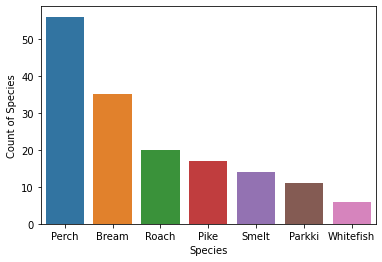

In [20]:
sns.barplot(x=t.index,y=t['Species'])
plt.xlabel('Species')
plt.ylabel('Count of Species')

In [21]:
df.corr()

,Weight,LengthVer,LengthDia,LengthCro,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
LengthVer,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
LengthDia,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
LengthCro,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


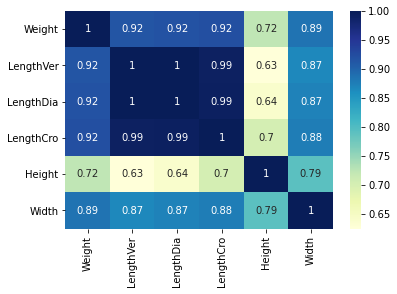

In [23]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

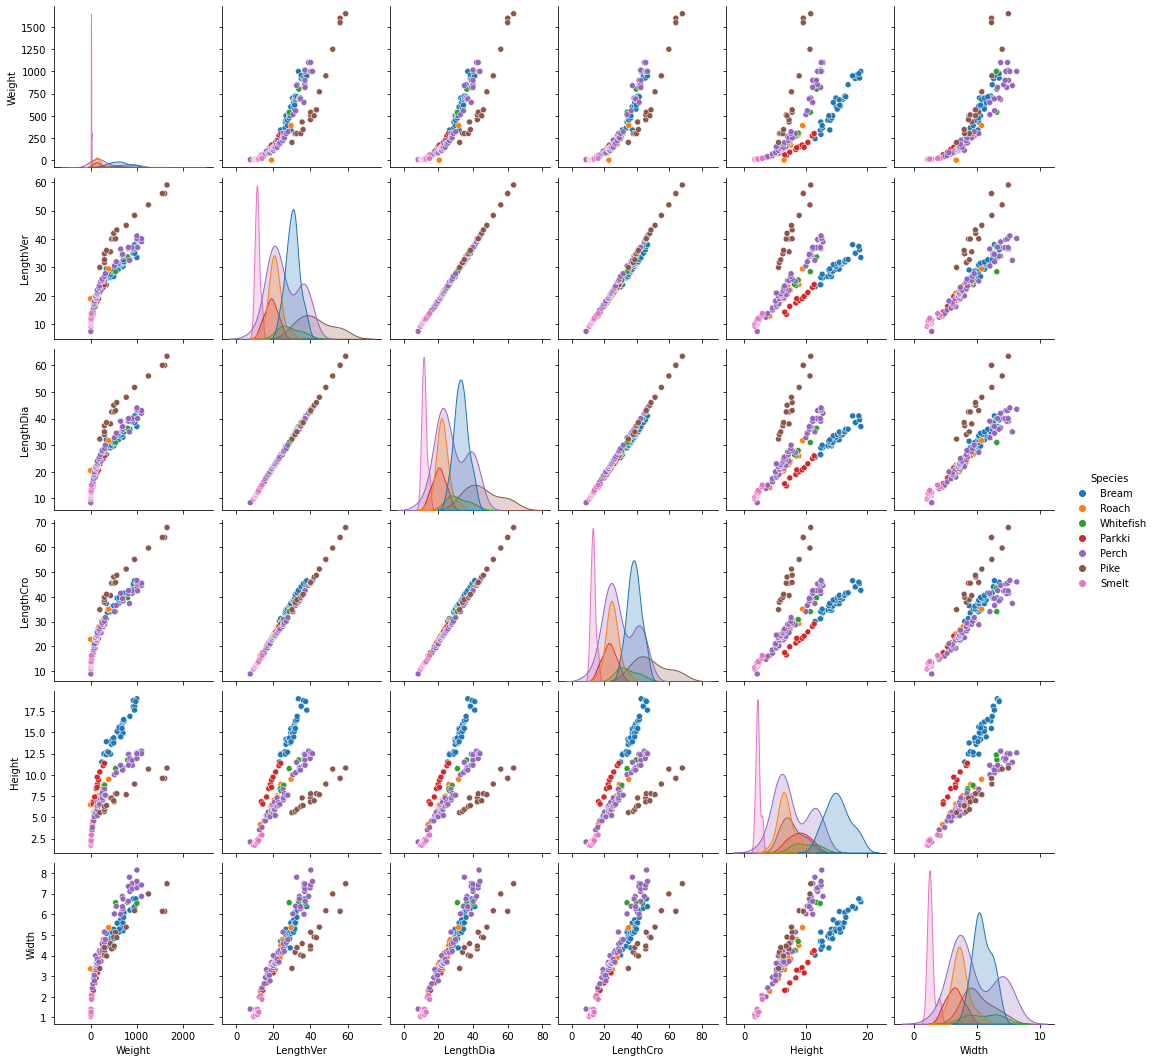

In [31]:
g=sns.pairplot(df,kind='scatter',hue='Species');

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


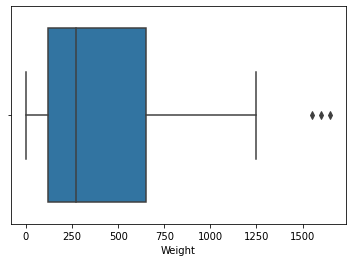

In [30]:
#Analysing the outlier
sns.boxplot(x=df['Weight']);

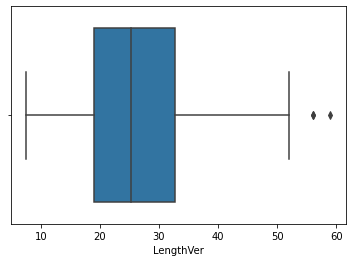

In [32]:
sns.boxplot(x=df['LengthVer']);

In [35]:
dfw=df['Weight']
dfw_q1=dfw.quantile(0.25)
dfw_q3=dfw.quantile(0.75)
dfw_IQR=dfw_q3-dfw_q1
dfw_lowerend=dfw_q1-(1.5*dfw_IQR)
dfw_uperend=dfw_q3+(1.5*dfw_IQR)

In [40]:
dfw_q1,dfw_q3,dfw_lowerend,dfw_IQR,dfw_uperend

(120.0, 650.0, -675.0, 530.0, 1445.0)

In [41]:
df_outliers=dfw[(dfw<dfw_lowerend)| (dfw>dfw_uperend)]
df_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

0      False
1      False
2      False
3      False
4      False
       ...  
154    False
155    False
156    False
157    False
158    False
Name: Weight, Length: 159, dtype: bool


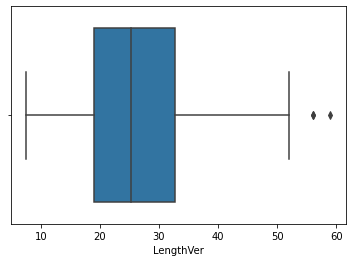

In [52]:
sns.boxplot(x=df['LengthVer']);

In [56]:
dflv=df['LengthVer']
dflv_q1=dflv.quantile(0.25)
dflv_q3=dflv.quantile(0.75)
dflv_IQR=dflv_q3-dflv_q1
dflv_lowerend=dflv_q1-(1.5*dflv_IQR)
dflv_upperend=dflv_q3+(1.5*dflv_IQR)

dflv_outliers=dflv[(dflv<dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

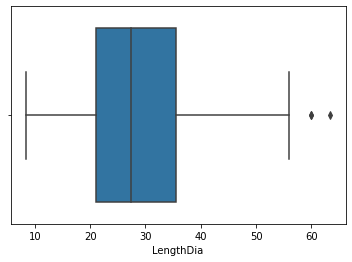

In [57]:
sns.boxplot(x=df['LengthDia']);

In [58]:
dfdia=df['LengthDia']
dfdia_q1=dfdia.quantile(0.25)
dfdia_q3=dfdia.quantile(0.75)
dfdia_IQR=dfdia_q3-dfdia_q1
dfdia_lowerend=dfdia_q1-(1.5*dfdia_IQR)
dfdia_uperend=dfdia_q3+(1.5*dfdia_IQR)


In [59]:
dfdia_outliers=dfdia[(dfdia<dfdia_lowerend)|(dfdia>dfdia_uperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

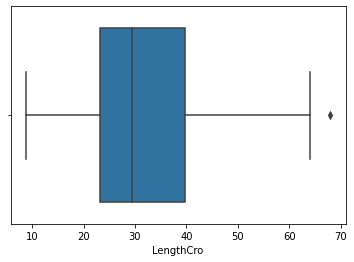

In [60]:
sns.boxplot(x=df['LengthCro'])

In [61]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

In [62]:
df[142:145]

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [66]:
df1=df.drop([142,143,144])

In [67]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
LengthVer,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
LengthDia,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
LengthCro,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [69]:
y=df1['Weight']
X=df1.iloc[:,2:7]

In [70]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 156, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [73]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -441.0088725388172
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


Multiple Linear Regression Formula:

y = b0 + b1X1 + b2X2 + b3X3 + ... + bnXn

y : Dependent variable

b0 : Constant

b1 - bn : Coefficients

X1 - Xn : Independent variables

In [77]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


In [86]:
y_head=reg.predict(X_train)

In [88]:
r2_score(y_train,y_head)

0.9116039087262157

In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.81965553 0.91733889 0.90970988 0.96003833 0.93655595 0.86878097
 0.91955783 0.8518532  0.84071059 0.81121078]


In [84]:
cross_val_score_train.mean()

0.8835411966576627

In [85]:
y_pred = reg.predict(X_test)

In [89]:
print(r2_score(y_test, y_pred))

0.8671964388742471


Text(0.5, 1.0, 'Linear Legression Model')

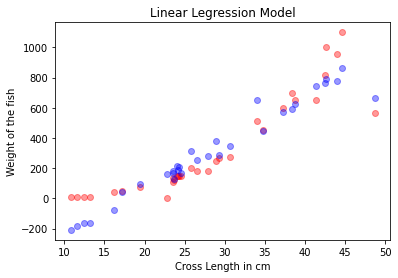

In [90]:
plt.scatter(X_test['LengthCro'],y_test,color='red',alpha=0.4)
plt.scatter(X_test['LengthCro'],y_pred,color='blue',alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Legression Model')

In [93]:
X_test,y_pred

(     LengthVer  LengthDia  LengthCro   Height   Width
 117       36.5       39.0       41.4  11.1366  6.0030
 75        15.0       16.2       17.2   4.5924  2.6316
 51        23.6       25.2       27.9   7.0866  3.9060
 31        35.0       38.5       44.0  18.0840  6.2920
 35        12.9       14.1       16.2   4.1472  2.2680
 40        19.0       20.5       22.8   6.4752  3.3516
 14        29.4       32.0       37.2  14.9544  5.1708
 109       30.5       32.8       34.0  10.0300  6.0180
 53        25.0       27.0       30.6   8.5680  4.7736
 149       10.7       11.2       12.4   2.0832  1.2772
 153       11.4       12.0       13.2   2.2044  1.1484
 78        16.8       18.7       19.4   5.1992  3.1234
 92        20.5       22.5       24.0   6.7920  3.6240
 90        20.0       22.0       23.5   5.5225  3.9950
 89        20.0       22.0       23.5   5.8750  3.5250
 5         26.8       29.7       34.7  13.6024  4.9274
 123       39.0       42.0       44.6  12.8002  6.8684
 16       

In [94]:
y_test

117     650.0
75       51.5
51      180.0
31      955.0
35       40.0
40        0.0
14      600.0
109     514.0
53      272.0
149       9.8
153       9.8
78       78.0
92      150.0
90      110.0
89      135.0
5       450.0
123    1100.0
16      700.0
19      650.0
29     1000.0
56      270.0
146       7.5
145       6.7
99      180.0
93      145.0
69      200.0
94      150.0
42      120.0
122     820.0
44      145.0
105     250.0
138     567.0
Name: Weight, dtype: float64

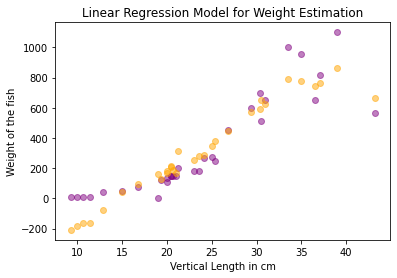

In [95]:
plt.scatter(X_test['LengthVer'], y_test, color='purple', alpha=0.5)
plt.scatter(X_test['LengthVer'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

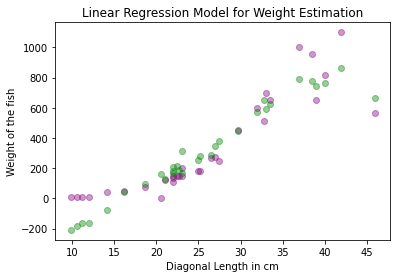

In [96]:
plt.scatter(X_test['LengthDia'], y_test, color='purple', alpha=0.4)
plt.scatter(X_test['LengthDia'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

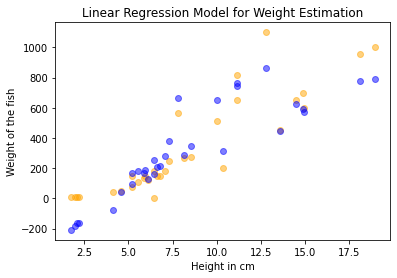

In [97]:
plt.scatter(X_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(X_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

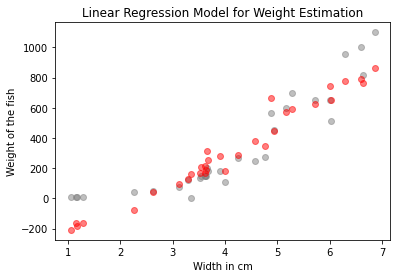

In [98]:
plt.scatter(X_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(X_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

In [99]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,746.034615
1,44.698577
2,282.287266
3,777.208209
4,-74.802289


In [100]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [101]:
y_new=pd.concat([y_test1,y_pred1],axis=1)
y_new

,Weight,Estimated Weight
0,650.0,746.034615
1,51.5,44.698577
2,180.0,282.287266
3,955.0,777.208209
4,40.0,-74.802289
5,0.0,159.717948
6,600.0,569.637735
7,514.0,651.097615
8,272.0,349.707917
9,9.8,-163.684074


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X1=df.iloc[:,1:]
y1=df.loc[:,'Species']
scaler.fit(X1)
X_scaled=scaler.transform(X1)

In [108]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y1=label.fit_transform(y1)

In [109]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [111]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_scaled,y1,test_size=0.2,random_state=42)

In [112]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred = clf.predict(X_test1)

In [115]:
y_pred

array([2, 5, 2, 2, 2, 0, 5, 2, 2, 3, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 5, 0,
       0, 0, 0, 2, 2, 2, 5, 5, 3, 2])

In [118]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test1,y_pred)
print('Accuracy_score is: {}%'.format(accuracy*100))

Accuracy_score is: 81.25%


Text(0.5, 1.0, 'Confusion Matrix')

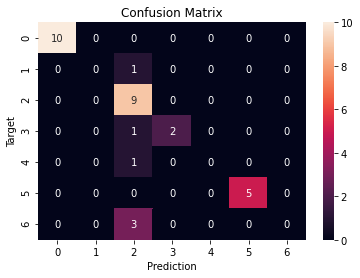

In [120]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test1, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')